In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [6]:

from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [10]:
# Loading the candy data from an url

candy_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1/candy-data.csv"
candy_data = pd.read_csv(candy_url)
candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [14]:
#extracting features and labels
X=candy_data.drop(['winpercent','competitorname'],axis=1)
Y=candy_data['winpercent']

In [21]:
#splitting into test and train data
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

#instantiating the classifier 
rfr= RandomForestRegressor(n_estimators=25,random_state=1111,max_features=4)

#Fitting the instat
rfr.fit(X_train,Y_train)

#printing the error 
print('the error in train data {0:.2f}'.format(mean_absolute_error(Y_train,rfr.predict(X_train))))
print('the error in test data {0:.2f}'.format(mean_absolute_error(Y_test,rfr.predict(X_test))))

the error in train data 3.99
the error in test data 8.57


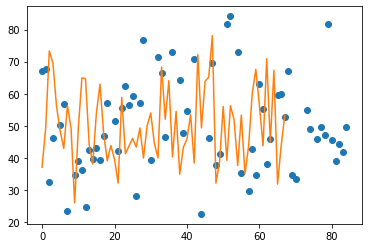

In [23]:
plt.plot(Y_train,'o')
plt.plot(rfr.predict(X_train))
#we can see the model is overfit and might be learning the values

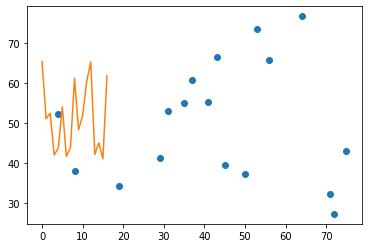

In [24]:
plt.plot(Y_test,'o')
plt.plot(rfr.predict(X_test))

In [57]:
#loading newdata
tic_tac_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1/tic-tac-toe_csv.csv"
tic_tac_data = pd.read_csv(tic_tac_url)
tic_tac_data.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [58]:
#dimensions of tic tac data
np.shape(tic_tac_data)

(958, 10)

In [59]:
tic_tac_data.rename(columns={'class':'target'}, inplace=True)
#inplace ignore the value of the copy
#class is reserved in python

In [60]:
tic_tac_data.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,target
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [61]:
mapping_data={'x':1,"o":0}
#converting to numericalvalues

#counting the unique values in target
tic_tac_data.target.value_counts()

True     626
False    332
Name: target, dtype: int64

In [62]:
tic_tac_data.target= tic_tac_data.target.apply(lambda x: 0 if x==False else 1)


In [63]:
#extracting the label  and features
y=tic_tac_data['target']
tic_tac_data=tic_tac_data.drop(['target'],axis=1)

In [64]:
#changing the moves to binary
for i in tic_tac_data.columns:
    tic_tac_data[i]=tic_tac_data[i].map(mapping_data)

In [65]:
tic_tac_data.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR
0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN
4,1.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,NaN


In [72]:
#missing values are replaced using a simple imputer
x=SimpleImputer().fit_transform(tic_tac_data)

In [73]:
#splitting the df
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=123)


In [87]:
from sklearn.metrics import accuracy_score
test_score, train_score=[],[]
z=[1,2,3,4,5,10,20,50]
for i in z:
    
    rfc = RandomForestClassifier(n_estimators=i,random_state=1111)
    rfc.fit(x_train,y_train)

    
    train_predict=rfc.predict(x_train)
    test_predict=rfc.predict(x_test)
    
    train_score.append(round(accuracy_score(y_train,train_predict),2))
    test_score.append(round(accuracy_score(y_test,test_predict),2))
    
print('traning score:{}'.format(train_score))
    
print('testing score:{}'.format(test_score))
    

traning score:[0.94, 0.95, 0.98, 0.99, 0.99, 1.0, 1.0, 1.0]
testing score:[0.8, 0.8, 0.9, 0.91, 0.93, 0.96, 0.98, 1.0]


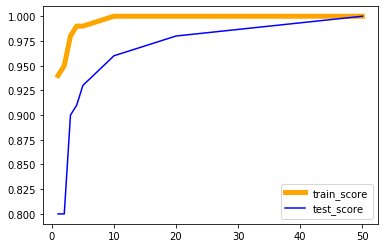

In [93]:
plt.plot(z,train_score,color='orange',linewidth=5)
plt.plot(z,test_score,color='blue')
plt.legend(['train_score','test_score'],loc='lower right')

In [102]:

#Visualizing  effect of feature normalization

toy_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1/toy_data.csv"
df = pd.read_csv(toy_url) 
print(df.head())
print(df.shape)

   Country  Age  Salary Purchased
0   France   44   72000        No
1    Spain   27   48000       Yes
2  Germany   30   54000        No
3    Spain   38   61000        No
4  Germany   40    1000       Yes
(10, 4)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B013631288>,
      dtype=object)

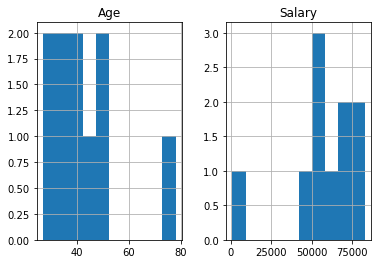

In [99]:
df.hist()

In [100]:
from sklearn import preprocessing
#slicing the dataframe to get age and salary
x=df.iloc[:,1:3].values

min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
x_after_minmax=min_max_scaler.fit_transform(x)
print(x_after_minmax)


[[0.33333333 0.86585366]
 [0.         0.57317073]
 [0.05882353 0.64634146]
 [0.21568627 0.73170732]
 [0.25490196 0.        ]
 [0.15686275 0.69512195]
 [1.         0.62195122]
 [0.41176471 0.95121951]
 [0.45098039 1.        ]
 [0.19607843 0.80487805]]


In [104]:
#Standardisation
Standardisation = preprocessing.StandardScaler() 
x_after_Standardisation = Standardisation.fit_transform(x) 
print ("\nAfter Standardisation : \n", x_after_Standardisation)


After Standardisation : 
 [[ 0.09536935  0.66527061]
 [-1.15176827 -0.43586695]
 [-0.93168516 -0.16058256]
 [-0.34479687  0.16058256]
 [-0.1980748  -2.59226136]
 [-0.56487998  0.02294037]
 [ 2.58964459 -0.25234403]
 [ 0.38881349  0.98643574]
 [ 0.53553557  1.16995867]
 [-0.41815791  0.43586695]]


In [108]:
diabetes_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1/diabetes.csv"
diabetes_data = pd.read_csv(diabetes_url)
print(diabetes_data.head()) 
print(diabetes_data.shape)

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  
(768, 9)


In [110]:
diabetes_data.columns


Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [114]:
diabetes_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [116]:
#checking is there any null values
diabetes_data.isna().sum()

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64

In [118]:
diabetes_data.diabetes.value_counts() 

0    500
1    268
Name: diabetes, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B0155B0F88>,
      dtype=object)

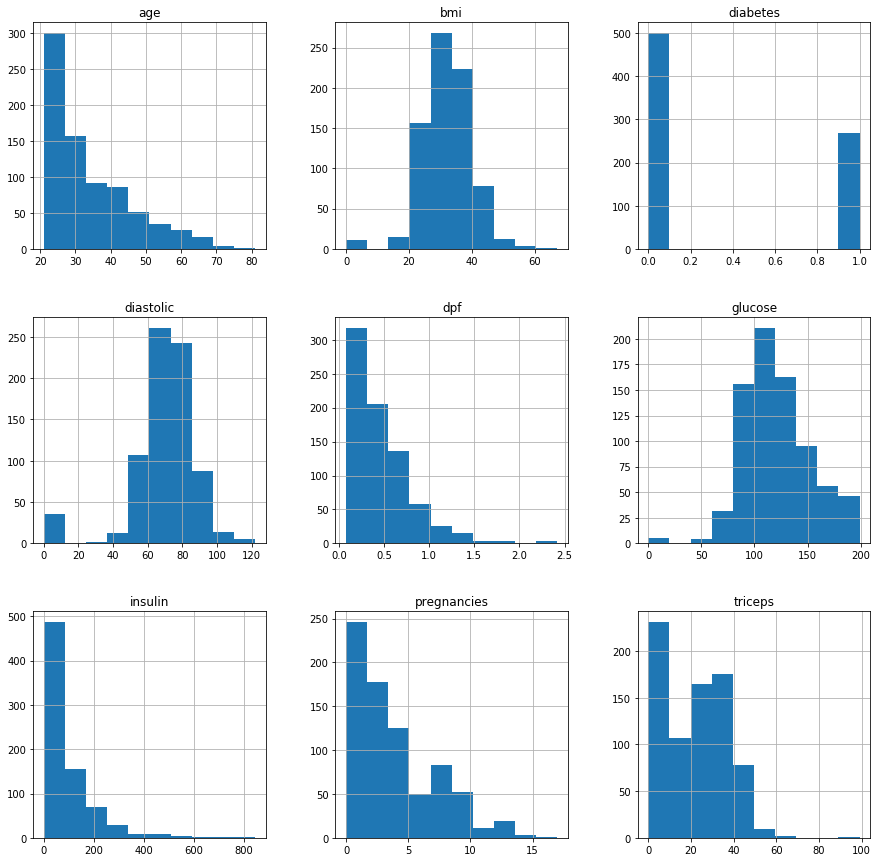

In [121]:
diabetes_data.hist(figsize=(15,15))

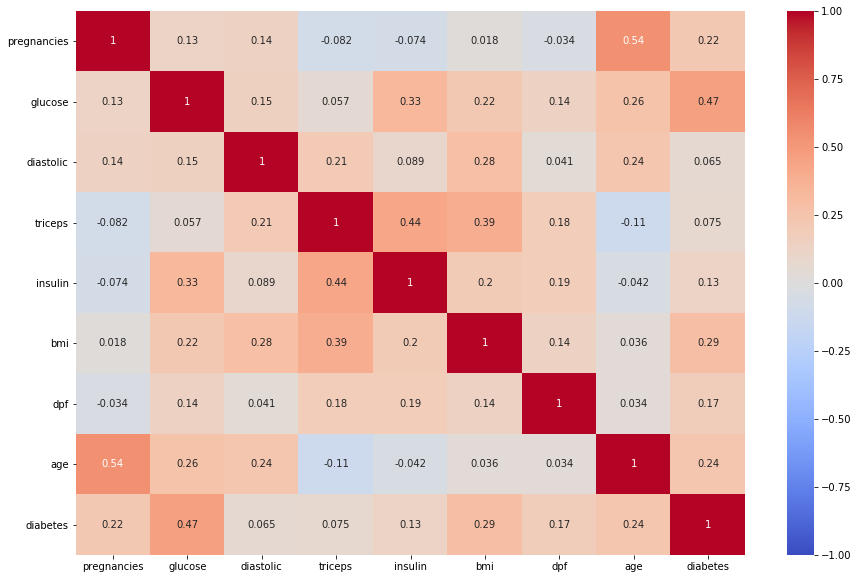

In [123]:
# Visualizing the correlation matrix 
plt.figure(figsize=(15,10))


sns.heatmap(diabetes_data.corr(), 
            vmin = -1,
            cmap='coolwarm',
            annot=True,
            )
# plt.savefig('corr-matrix.png')
plt.show()

In [128]:
label= diabetes_data['diabetes']
feature_d=diabetes_data.drop(['diabetes'],axis=1)

In [129]:
#splitting using test_train_split
x_train,x_test,y_train,y_test=train_test_split(feature_d,label,train_size=.02, random_state=123)


In [132]:
from xgboost import XGBClassifier
import xgboost as xgb

In [145]:
xgb_clf=xgb.XGBClassifier(learning_rate=0.01)
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

59.5 %


In [147]:
predict=xgb_clf.predict(x_train)

accuracy=accuracy_score(y_train,predict)
print(np.round(accuracy*100,2),'%')

86.67 %


In [148]:
predict=xgb_clf.predict(x_test)

accuracy=accuracy_score(y_test,predict)
print(np.round(accuracy*100,2),'%')

59.5 %


In [149]:
print(confusion_matrix(y_test,predict))
print('--'*69)
print(classification_report(y_test,predict))


[[244 247]
 [ 58 204]]
------------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.50      0.62       491
           1       0.45      0.78      0.57       262

    accuracy                           0.59       753
   macro avg       0.63      0.64      0.59       753
weighted avg       0.68      0.59      0.60       753



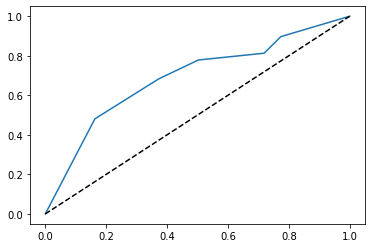

In [151]:
#plot roc curve
from sklearn.metrics import roc_curve 
probs=xgb_clf.predict_proba(x_test)
probs=probs[:,1]
fper, tper,thresholds =roc_curve(y_test, probs)
plt.plot(fper,tper)
plt.plot([0,1],[0,1],'k--')
plt.show()
